# 2차원 데이터

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [27]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 데이터프레임으로 불러와서
두 점수 데이터의 상관관계를 분석한다.
예를 들어, '수학을 잘하는 학생은 영어도 잘하는가'와 같은 두 데이터의 상관성을 확인한다.

상관성은 보통 선형 상관계수로 평가되며, 이를 설명하기 위해 먼저 공분산 개념을 소개한다.

## 선형 상관관계

어떤 학생의 영어 점수가 높을 수록 수학 점수도 함께 높아지는 경향이 있을 때
두 점수 사이에 양의 상관관계가 있다고 말한다.
반면에 영어 점수가 높을 수록 수학 점수가 떨어질 때는
두 점수 사이에 음의 상관관계가 존재한다.
그런데 영어 점수가 달라지더라도 수학 점수는 별 변화가 없을 때는 두 데이터의
선형 상관관계가 없다.

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 데이터프레임으로 불러와서
두 점수 데이터의 상관관계를 분석한다.
예를 들어, '수학을 잘하는 학생은 영어도 잘하는가'와 가트 두 데이터의 상관성을 확인한다.

상관성은 보통 공분산 또는 상관계수를 이용한 선형 상관계수로 평가한다.

### 데이터 준비

50명의 영어와 수학 점수를 담고 있는 csv 파일을 데이터프레임으로 불러온다. 이때 학생번호를 인덱스로 지정한다

In [9]:
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

english와 mathematics 두 개의 특성이 포함되어 있으며 각각 50개의 데이터 샘플을 포함한다.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   english      50 non-null     int64
 1   mathematics  50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


**10개 데이터 샘플 추출**

보다 쉬운 설명하기 위해 처음 10개의 데이터만 이용해서
두 종류의 데이터 사이의 상관관계를 설명한다.

먼저 학생들의 이름을 활용할 수 있도록 
처음 열 명의 이름 A, B, C, …, J를 인덱스로 지정하며
또한 인덱스의 이름을 student로 지정한다.
두 가지 방식으로 진행하며, 먼저 넘파이 어레이를 활용한다.

방식 1: 넘파이 어레이 활용

각각의 특성에서 처음 10개 데이터만 추출해서 어레이로 지정한다.

In [11]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

추출된 두 개의 데이터에 대해 각각 english, mathematics 특성명과 함께
각 데이터 샘플의 인덱스를 언급된 알파벳으로 지정하면서
새로운 데이터프레임을 생성한다.
또한 인덱스의 이름을 student로 한 번에 지정한다.

In [18]:
scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(list('ABCDEFGHIJ'),
                                        name='student'))

In [19]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


방식 2: 데이터프레임 슬라이싱 활용

처음 10개의 데이터 샘플을 데이터프레임에서 슬라이싱을 이용하여 직접 추출할 수 있다.
단, 원본은 그대로 두고 슬라이싱 후 사본을 지정한다.

이유는 데이터프레임의 슬라이싱은 
{numref}`%s장 <ch-numpy-array>`에서 소개한
뷰<font size='2'>view</font> 기능을 사용하기 때문이다.
뷰 방식으로 생성된 데이터프레임을 수정하면 원본 데이터프레임도 함께 수정되기에
이를 피하기 위해 일반적으로 사본을 만드는 것을 추천한다.

In [16]:
scores_df = df.iloc[:10].copy()
scores_df

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76
6,48,60
7,65,81
8,49,66
9,65,78


데이터프렘의 `index` 속성에 데이터셋의 크기에 해당하는 리스트를 지정하는
방식으로 인덱스를 변경한다.

In [20]:
scores_df.index = list('ABCDEFGHIJ')

데이터프레임의 `index` 속성이 가리키는 `Index` 객체의 `name` 속성을 `student`로 지정한다.

In [21]:
scores_df.index.name = 'student'

이전 방식과 동일한 결과를 얻는다.

In [22]:
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


### 산점도

먼저 두 데이터 사이의 선형 상관관계의 정도를 눈으로 어느 정도 파악할 수 있는지
여부를 보기 위해 산점도를 이용한다.
산점도는 `matplotlib.pyplot` 라이브러리에 포함된 `scatter()` 함수를 이용한다.

x-축이 영어 점수, y-축이 수학 점수의 분포를 보여준다.

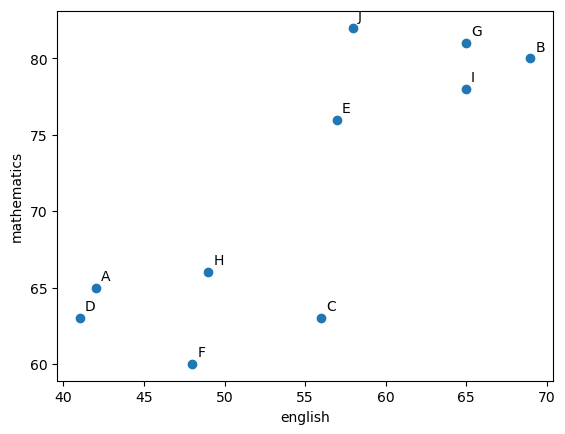

In [59]:
plt. scatter(en_scores, ma_scores)
plt.xlabel('english')
plt.ylabel('mathematics')

# 학생 데이터 각각에 이름 추가
for i, name in enumerate(scores_df.index):
    plt.annotate(name, (en_scores[i]+0.3, ma_scores[i]+0.5))

# plt.xticks(range(35, 76, 5))
# plt.yticks(range(55, 90, 5))
    
plt.show()

위 산점도를 통해 영어 점수가 높아질 수록 수학 점수도 기본적으로 올라가는 경향을 잘 보여준다. 
즉 영어 점수와 수학 점수는 양의 상관관계를 갖는다고 말할 수 있다.

상관관계를 수치화할 수 있으며, 공분산과 상관계수가 활용된다.
먼저 공분산을 소개한다.

### 공분산

영어 점수와 수학 점수 사이의 선형 상관관계를 척도로 갖는 공분산을 설명한다.

In [11]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [12]:
summary_df['product of deviations'].mean()

62.800000

In [13]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [14]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800000, 62.800000)

In [15]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000000, 68.440000)

In [16]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000000, 68.440000)

## 상관계수

In [17]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
    (np.std(en_scores) * np.std(ma_scores))

0.818569

In [18]:
np.corrcoef(en_scores, ma_scores)

array([[1.      , 0.818569],
       [0.818569, 1.      ]])

In [19]:
scores_df.corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000
